In [ ]:
import pandas as pd

#  Load your new dataset
df = pd.read_csv("Augmented_Dataset.csv")

#  Basic Info
print("🔎 Dataset Info:")
print(df.info())
print("\n📊 Data Preview:")
print(df.head())

# Check for Missing Values
print("\n🧩 Missing Values:")
print(df.isnull().sum())

# Verify Date Columns (if they exist)
date_cols = ['Last_Login_Date', 'Subscription_Start_Date']
for col in date_cols:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col])
            print(f"✅ {col} converted to datetime.")
        except Exception as e:
            print(f"❌ Issue with {col}: {e}")

# Check for Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\n🧾 Categorical Columns (likely need encoding):", categorical_cols)

# Confirm Required Columns for Churn Prediction
required = [
    'Complaints', 'Age', 'Region', 'Preferred Payment Method',
    'Customer_Segment', 'Days_Since_Last_Login',
    'Subscription_Tenure_Days', 'Churn'
]
print("\n📋 Required Columns Present:")
for col in required:
    print(f"✔ {col}" if col in df.columns else f"❌ {col} is MISSING")

#  Quick Stats Overview
print("\n📈 Numerical Stats:")
print(df.describe())



🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  550 non-null    object 
 1   Name                         550 non-null    object 
 2   Age                          550 non-null    int64  
 3   Gender                       550 non-null    object 
 4   Email                        550 non-null    object 
 5   Phone Number                 550 non-null    object 
 6   Purchase History (count)     550 non-null    int64  
 7   Average Purchase Amount ($)  550 non-null    float64
 8   Total Spend ($)              550 non-null    float64
 9   Region                       550 non-null    object 
 10  Preferred Payment Method     550 non-null    object 
 11  Transaction Time             550 non-null    object 
 12  Transaction Amount           550 non-null    object 
 13  Loca

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Augmented_Dataset.csv")

# Convert dates
df['Last_Login_Date'] = pd.to_datetime(df['Last_Login_Date'])
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])

# Define today's date (for calculation reference)
today = pd.to_datetime("2025-05-21")

# Add missing features
df['Days_Since_Last_Login'] = (today - df['Last_Login_Date']).dt.days
df['Subscription_Tenure_Days'] = (today - df['Subscription_Start_Date']).dt.days

# Optional: Save this cleaned dataset
df.to_csv("Augmented_Dataset_Processed.csv", index=False)

print(" Added 'Days_Since_Last_Login' and 'Subscription_Tenure_Days'")
from google.colab import files
files.download("Augmented_Dataset_Processed.csv")


✅ Added 'Days_Since_Last_Login' and 'Subscription_Tenure_Days'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

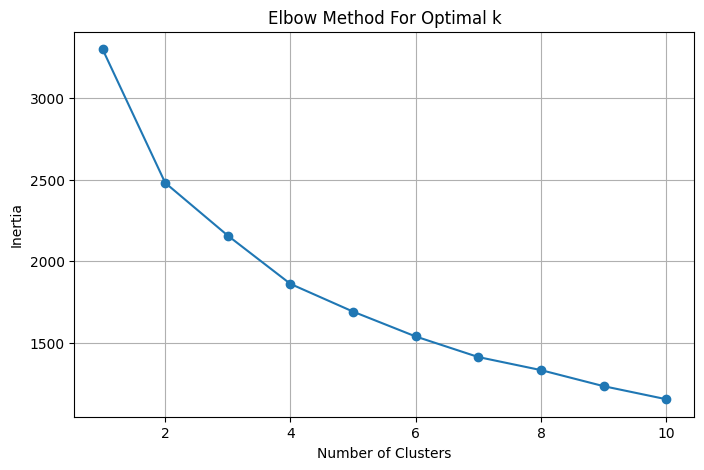

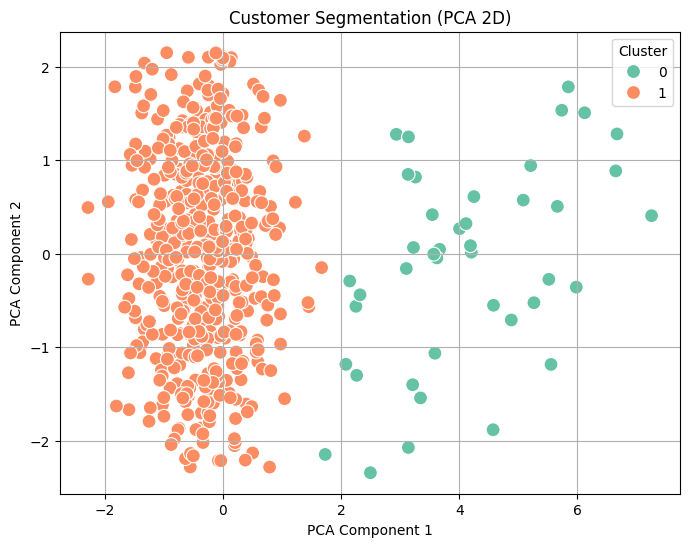


📈 Cluster Summary (Numeric Only):
         Purchase History (count)  Average Purchase Amount ($)  \
Cluster                                                          
0                           25.23                       275.79   
1                           10.09                       149.00   

         Total Spend ($)    Age  
Cluster                          
0               11925.37  46.72  
1                1597.18  45.63  

🧭 Region Distribution by Cluster:
Cluster  Region
0        West       14
         North      13
         East        8
         South       8
1        West      140
         North     129
         East      123
         South     115
Name: count, dtype: int64

💳 Payment Method Distribution by Cluster:
Cluster  Preferred Payment Method
0        PayPal                       14
         Bank Transfer                10
         Credit Card                  10
         Cash                          9
1        PayPal                      143
         Debit Card  

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Step 2: Load the Updated Dataset
df = pd.read_csv("Augmented_Dataset_Processed.csv")

# 🧹 Step 3: Select Features for Clustering
features = [
    'Purchase History (count)',
    'Average Purchase Amount ($)',
    'Total Spend ($)',
    'Age',
    'Region',
    'Preferred Payment Method'
]
df_seg = df[features].copy()

#  Encode Categorical Features
for col in ['Region', 'Preferred Payment Method']:
    le = LabelEncoder()
    df_seg[col] = le.fit_transform(df_seg[col])

# Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg)

#  Elbow Method to Determine Optimal Clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Choose Optimal k and Fit Final K-Means
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segmentation (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# View Numeric Cluster Summary
numeric_features = [
    'Purchase History (count)',
    'Average Purchase Amount ($)',
    'Total Spend ($)',
    'Age'
]

cluster_summary = df.groupby('Cluster')[numeric_features].mean().round(2)
print("\n📈 Cluster Summary (Numeric Only):")
print(cluster_summary)

# View Category Distributions
print("\n🧭 Region Distribution by Cluster:")
print(df.groupby('Cluster')['Region'].value_counts())

print("\n💳 Payment Method Distribution by Cluster:")
print(df.groupby('Cluster')['Preferred Payment Method'].value_counts())

#  Add Human-Readable Labels (adjust after seeing summary)
segment_labels = {
    0: "Budget/Occasional Buyers",
    1: "Premium Loyal Customers",
    2: "Regular Shoppers"
}

df['Customer_Segment'] = df['Cluster'].map(segment_labels)

#  Final Preview
print("\n🔖 Final Segmented Data (Preview):")
print(df[['Customer ID', 'Cluster', 'Customer_Segment']].head())

#  Save Final Output
df.to_csv("Augmented_Dataset_Segmented.csv", index=False)
print("\n📦 Final file saved as 'Augmented_Dataset_Segmented.csv'")


In [ ]:
#  Assign Human-Readable Labels to Clusters (adjust based on your cluster summary)
segment_labels = {
    0: "Budget/Occasional Buyers",
    1: "Premium Loyal Customers",
}

#  Map cluster numbers to descriptive segment labels
df['Customer_Segment'] = df['Cluster'].map(segment_labels)

#  Save the updated dataset with segmentation
df.to_csv("Augmented_Dataset_Segmented.csv", index=False)

print("✅ Saved updated dataset with segment labels to 'Augmented_Dataset_Segmented.csv'")
from google.colab import files
files.download("Augmented_Dataset_Segmented.csv")


✅ Saved updated dataset with segment labels to 'Augmented_Dataset_Segmented.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Augmented_Dataset_Segmented.csv")

#  Calculate Spend per Day
df['Spend_per_day'] = df['Total Spend ($)'] / (df['Subscription_Tenure_Days'] + 1)

#  Calculate Engagement Score
df['Engagement_Score'] = (
    df['Purchase History (count)'] * df['Average Purchase Amount ($)']
) / (df['Complaints'] + 1)

# Step 3: Add Inactivity Flag
df['Is_Inactive'] = (df['Days_Since_Last_Login'] > 180).astype(int)

# Step 4: Calculate Average Monthly Sales (past 6 months)
sales_cols = [
    'Sales_Month_1', 'Sales_Month_2', 'Sales_Month_3',
    'Sales_Month_4', 'Sales_Month_5', 'Sales_Month_6'
]
df[sales_cols] = df[sales_cols].apply(pd.to_numeric, errors='coerce')  # Ensure correct types
df['Avg_Sales_6mo'] = df[sales_cols].mean(axis=1)

# Save the updated dataset
df.to_csv("Augmented_Dataset_Derived.csv", index=False)
print("✅ Derived features added and saved as 'Augmented_Dataset_Derived.csv'")
from google.colab import files
files.download("Augmented_Dataset_Derived.csv")

✅ Derived features added and saved as 'Augmented_Dataset_Derived.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-35-38331ef9e5e0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')


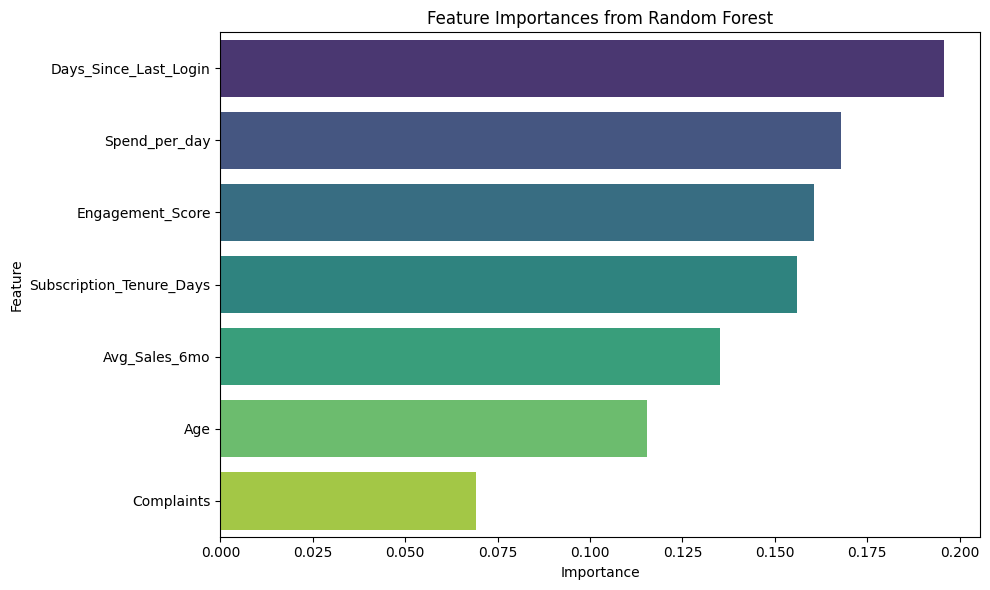

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you're using the same features you trained the model on
feature_names = X_train.columns.tolist()

# Get feature importances
importances = best_model.named_steps['rf'].feature_importances_

# Handle mismatch if needed (precaution)
min_len = min(len(feature_names), len(importances))
feature_df = pd.DataFrame({
    'Feature': feature_names[:min_len],
    'Importance': importances[:min_len]
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()


Saving Augmented_Dataset_Derived.csv to Augmented_Dataset_Derived.csv
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(



✅ Best Parameters:
{'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        83
           1       0.31      0.41      0.35        27

    accuracy                           0.64       110
   macro avg       0.55      0.56      0.55       110
weighted avg       0.67      0.64      0.65       110

🎯 ROC-AUC Score: 0.568


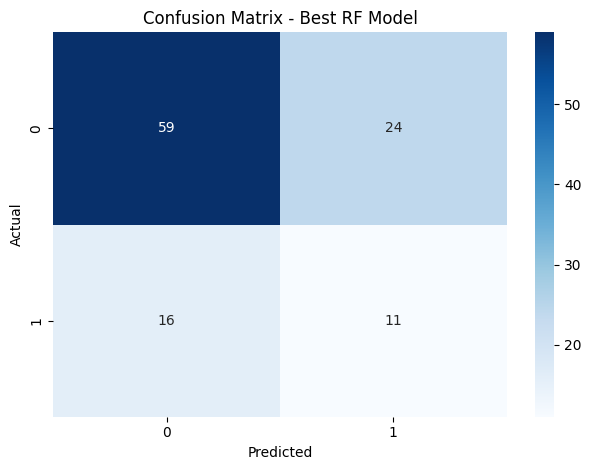


🔧 Tuned Threshold = 0.3
Precision: 0.29 | Recall: 0.70 | F1-Score: 0.41
Confusion Matrix:
 [[37 46]
 [ 8 19]]

📤 Exported to: 'Churn_Predictions_With_Risk.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
# Load the dataset
df = pd.read_csv("Augmented_Dataset_Derived.csv")

# Select Top Features
features = [
    'Days_Since_Last_Login',
    'Spend_per_day',
    'Engagement_Score',
    'Subscription_Tenure_Days',
    'Avg_Sales_6mo',
    'Age',
    'Complaints'
]
X = df[features]
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fast Hyperparameter Grid
param_grid = {
    'rf__n_estimators': [100, 300],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 5]
}

# Pipeline with SMOTE + Random Forest
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

scorer = make_scorer(roc_auc_score, needs_proba=True)

# Grid Search CV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scorer,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Evaluate Best Model
best_model = grid_search.best_estimator_
print("\n✅ Best Parameters:")
print(grid_search.best_params_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"🎯 ROC-AUC Score: {roc_auc:.3f}")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best RF Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Threshold Tuning at 0.3
threshold = 0.3
y_thresh = (y_proba >= threshold).astype(int)

precision = precision_score(y_test, y_thresh)
recall = recall_score(y_test, y_thresh)
f1 = f1_score(y_test, y_thresh)

print(f"\n🔧 Tuned Threshold = {threshold}")
print(f"Precision: {precision:.2f} | Recall: {recall:.2f} | F1-Score: {f1:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_thresh))

# Export Churn Predictions with Risk Level
df_export = df.copy()
df_export['Churn_Probability'] = best_model.predict_proba(X)[:, 1]
df_export['Churn_Predicted'] = (df_export['Churn_Probability'] >= threshold).astype(int)

def risk_level(prob):
    if prob >= 0.6:
        return "High"
    elif prob >= 0.3:
        return "Medium"
    else:
        return "Low"

df_export['Risk_Level'] = df_export['Churn_Probability'].apply(risk_level)

# Columns to export
output = df_export[[
    'Customer ID', 'Customer_Segment', 'Churn_Probability',
    'Churn_Predicted', 'Risk_Level'
]]

# Save to file
output.to_csv("Churn_Predictions_With_Risk.csv", index=False)
print("\n📤 Exported to: 'Churn_Predictions_With_Risk.csv'")
from google.colab import files
files.download("Churn_Predictions_With_Risk.csv")

In [ ]:
# Churn Risk Prediction and Action List Generation
import pandas as pd

df = pd.read_csv("Augmented_Dataset_Derived.csv")


features = [
    'Days_Since_Last_Login', 'Spend_per_day', 'Engagement_Score',
    'Subscription_Tenure_Days', 'Avg_Sales_6mo', 'Age', 'Complaints'
]
X_all = df[features]

# Generate churn probability using the trained model
df['Churn_Probability'] = best_model.predict_proba(X_all)[:, 1]

# Segment customers by risk level based on probability
def classify_risk(prob):
    if prob >= 0.6:
        return "High"
    elif prob >= 0.3:
        return "Medium"
    else:
        return "Low"

df['Risk_Level'] = df['Churn_Probability'].apply(classify_risk)

# Generate action lists (examples):

# High Risk & High Spend Customers
df_high_risk_high_spend = df[(df['Risk_Level'] == 'High') & (df['Total Spend ($)'] > 5000)]

# Medium Risk with 2+ Complaints
df_medium_complaints = df[(df['Risk_Level'] == 'Medium') & (df['Complaints'] >= 2)]

# Low Risk but High Value Customers
df_low_risk_valuable = df[(df['Risk_Level'] == 'Low') & (df['Total Spend ($)'] > 7000)]

# Export each list to a CSV
df_high_risk_high_spend.to_csv("High_Risk_High_Spend_Customers.csv", index=False)
df_medium_complaints.to_csv("Medium_Risk_Many_Complaints.csv", index=False)
df_low_risk_valuable.to_csv("Low_Risk_Valuable_Customers.csv", index=False)

print(" Action lists generated and exported!")
from google.colab import files
files.download("Low_Risk_Valuable_Customers.csv")
files.download("Medium_Risk_Many_Complaints.csv")
files.download("High_Risk_High_Spend_Customers.csv")

✅ Action lists generated and exported!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-38-5ab0c1af355f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Risk_Level', order=['Low', 'Medium', 'High'], palette='coolwarm')


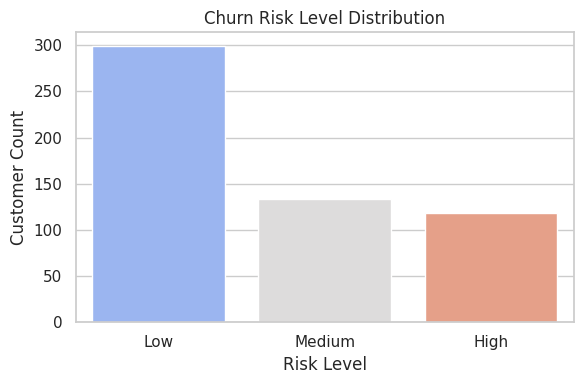

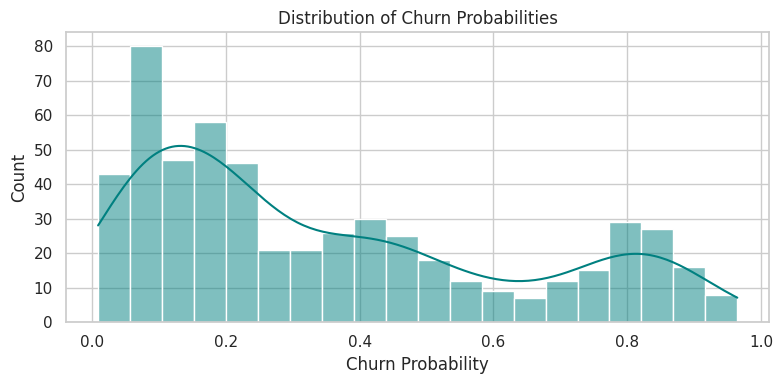

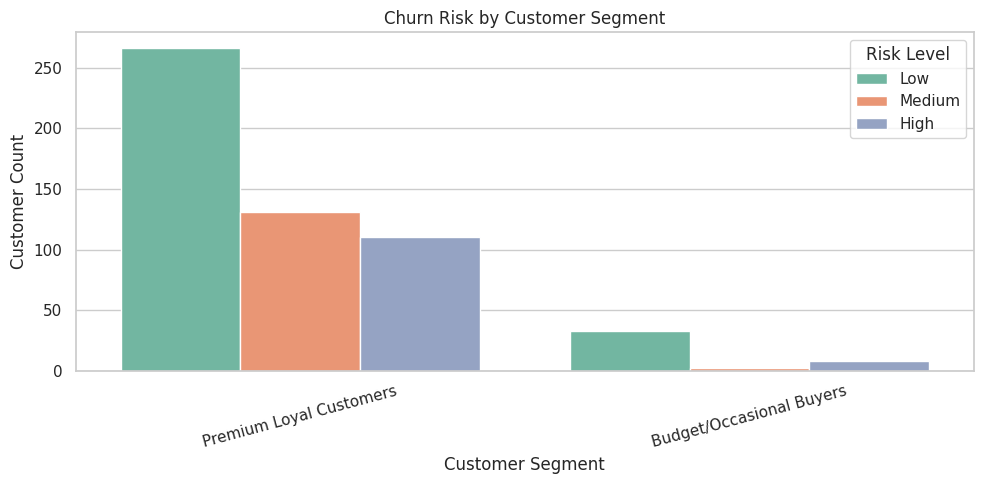

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Churn Risk Level Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Risk_Level', order=['Low', 'Medium', 'High'], palette='coolwarm')
plt.title("Churn Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()

# Churn Probability Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Churn_Probability'], bins=20, kde=True, color='teal')
plt.title("Distribution of Churn Probabilities")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Risk Level by Customer Segment (if you have Customer_Segment column)
if 'Customer_Segment' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Customer_Segment', hue='Risk_Level', palette='Set2',
                  order=df['Customer_Segment'].value_counts().index)
    plt.title("Churn Risk by Customer Segment")
    plt.xlabel("Customer Segment")
    plt.ylabel("Customer Count")
    plt.legend(title='Risk Level')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Augmented_Dataset_Derived.csv to Augmented_Dataset_Derived.csv


In [ ]:
import pandas as pd


# Load your dataset (replace with your path if needed)
df = pd.read_csv("Augmented_Dataset_Derived.csv")

# Define the function to simulate fraud
def simulate_fraud(row):
    # Set risky categories typically linked to fraud
    risky_categories = ['Electronics', 'Luxury', 'Furniture']

    # Define fraud signals
    mismatch = row['Location Mismatch'] == 'Yes'
    odd_hours = 'odd' in str(row['Transaction Time']).lower()
    high_amount = 'high' in str(row['Transaction Amount']).lower()
    risky_category = row['Category'] in risky_categories

    # Count how many suspicious behaviors this customer has
    suspicious_signals = sum([mismatch, odd_hours, high_amount, risky_category])

    # Mark as fraud if at least two conditions are met
    return 1 if suspicious_signals >= 2 else 0

# Apply the rule to create the 'Fraud' label
df['Fraud'] = df.apply(simulate_fraud, axis=1)

# Show counts of fraud vs non-fraud
print("✅ Fraud label distribution:")
print(df['Fraud'].value_counts())

# Optional: Save to file
df.to_csv("Dataset_With_Fraud_Label.csv", index=False)
print("✅ Dataset exported with fraud label as 'Dataset_With_Fraud_Label.csv'")
from google.colab import files
files.download("Dataset_With_Fraud_Label.csv")


✅ Fraud label distribution:
Fraud
0    530
1     20
Name: count, dtype: int64
✅ Dataset exported with fraud label as 'Dataset_With_Fraud_Label.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       106
           1       0.57      1.00      0.73         4

    accuracy                           0.97       110
   macro avg       0.79      0.99      0.86       110
weighted avg       0.98      0.97      0.98       110


🎯 ROC-AUC Score: 0.986


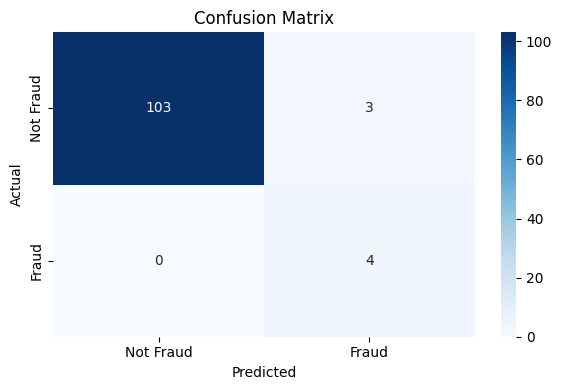

In [ ]:
# Full Fraud Detection Model Pipeline with SMOTE and Random Forest

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Load Data (after uploading or mounting Drive)
df = pd.read_csv("Augmented_Dataset_Derived.csv")

# Simulate Fraud Label
def simulate_fraud(row):
    risky_categories = ['Electronics', 'Luxury', 'Furniture']
    mismatch = row['Location Mismatch'] == 'Yes'
    odd_hours = 'odd' in str(row['Transaction Time']).lower()
    high_amount = 'high' in str(row['Transaction Amount']).lower()
    risky_category = row['Category'] in risky_categories
    suspicious_signals = sum([mismatch, odd_hours, high_amount, risky_category])
    return 1 if suspicious_signals >= 2 else 0

df['Fraud'] = df.apply(simulate_fraud, axis=1)

# Feature Selection and Encoding
features = [
    'Location Mismatch', 'Transaction Time', 'Transaction Amount',
    'Category', 'Preferred Payment Method', 'Region'
]

X = df[features].copy()
y = df['Fraud']

# Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Create Pipeline with SMOTE + RandomForest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train Model
pipeline.fit(X_train, y_train)

# Evaluation
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n🎯 ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


✅ Exported fraud predictions with risk labels to 'Fraud_Predictions_With_Risk.csv'


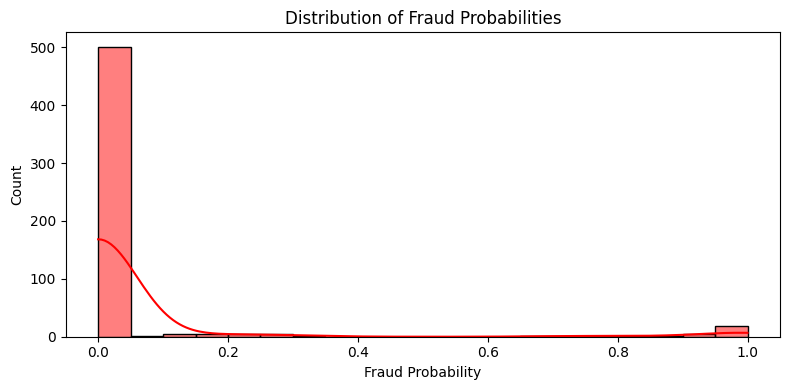

<ipython-input-6-8f25414ce21e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fraud_Risk_Level', order=['Low', 'Medium', 'High'], palette='Reds')


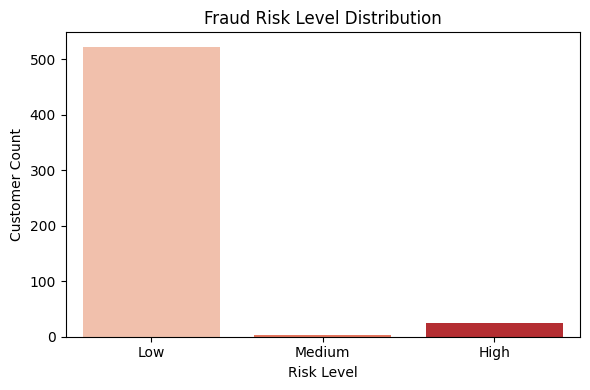

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add fraud probabilities to DataFrame
df['Fraud_Probability'] = pipeline.predict_proba(X)[:, 1]

# Categorize into Risk Levels
def classify_risk(prob):
    if prob >= 0.8:
        return "High"
    elif prob >= 0.5:
        return "Medium"
    else:
        return "Low"

df['Fraud_Risk_Level'] = df['Fraud_Probability'].apply(classify_risk)

# Export file for security review
df[['Customer ID', 'Transaction Time', 'Transaction Amount', 'Category',
    'Location Mismatch', 'Preferred Payment Method', 'Region',
    'Fraud', 'Fraud_Probability', 'Fraud_Risk_Level']].to_csv(
    "Fraud_Predictions_With_Risk.csv", index=False)

print("✅ Exported fraud predictions with risk labels to 'Fraud_Predictions_With_Risk.csv'")


# Visualize Fraud Probability Distribution (inline)
plt.figure(figsize=(8, 4))
sns.histplot(df['Fraud_Probability'], bins=20, kde=True, color='red')
plt.title("Distribution of Fraud Probabilities")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Risk Level Count Plot (inline)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fraud_Risk_Level', order=['Low', 'Medium', 'High'], palette='Reds')
plt.title("Fraud Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


✅ Exported dataset with Sales_Month_7 to CSV.
📊 MAE: 42.52
📉 RMSE: 56.59
🎯 R² Score: 0.83


<ipython-input-10-fa89f66cefa2>:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


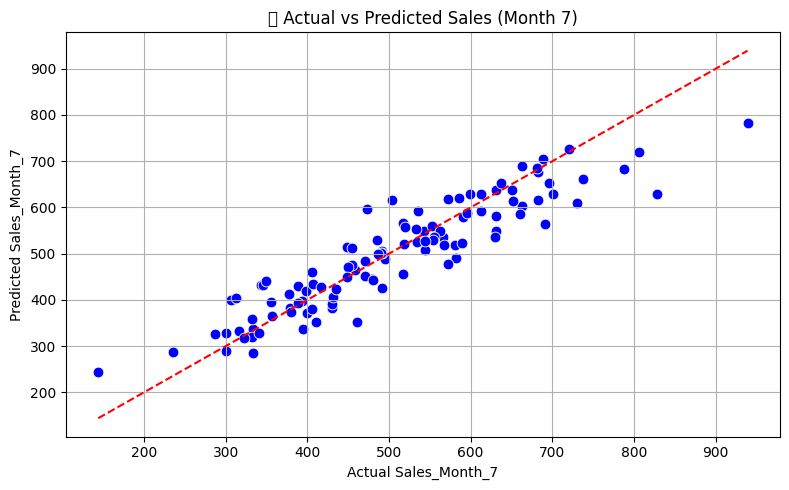

✅ Exported full dataset with predicted Sales_Month_7.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Augmented_Dataset_Derived.csv")
# Synthesize Sales_Month_7
np.random.seed(42)
df['Sales_Month_7'] = (
    0.4 * df['Sales_Month_6'] +
    0.3 * df['Sales_Month_5'] +
    0.2 * df['Sales_Month_4'] +
    np.random.normal(0, 50, size=len(df))
).round().astype(int)

# Export dataset with Sales_Month_7
df.to_csv("Dataset_with_Sales_Month_7.csv", index=False)
print("✅ Exported dataset with Sales_Month_7 to CSV.")

# Encode categorical features
for col in ['Customer_Segment', 'Region']:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Define features and target
features_7 = [
    'Sales_Month_1', 'Sales_Month_2', 'Sales_Month_3',
    'Sales_Month_4', 'Sales_Month_5', 'Sales_Month_6',
    'Customer_Segment', 'Region', 'Complaints',
    'Engagement_Score', 'Spend_per_day', 'Subscription_Tenure_Days'
]
target_7 = 'Sales_Month_7'

# Prepare data
df_model = df.dropna(subset=features_7 + [target_7])
X = df_model[features_7]
y = df_model[target_7]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("📊 Actual vs Predicted Sales (Month 7)")
plt.xlabel("Actual Sales_Month_7")
plt.ylabel("Predicted Sales_Month_7")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔁 Predict on the full dataset (after dropping NAs used for training)
full_predictions = model.predict(df_model[features_7])
df_model['Predicted_Sales_Month_7'] = np.round(full_predictions).astype(int)

# 🔗 Merge predictions back to the original DataFrame
df_with_predictions = df.copy()
df_with_predictions = df_with_predictions.merge(
    df_model[['Predicted_Sales_Month_7']],
    how='left',
    left_index=True,
    right_index=True
)

# 💾 Export full dataset with predictions
df_with_predictions.to_csv("Dataset_with_Predicted_Sales_Month_7.csv", index=False)
print("✅ Exported full dataset with predicted Sales_Month_7.")


# Download from Colab (if applicable)
from google.colab import files
files.download("Dataset_with_Predicted_Sales_Month_7.csv")